# INTRODUCTION

![SENTIMENT ANALYSIS](https://slideplayer.com/slide/3566570/12/images/1/What+is+Sentiment+Analysis.jpg)

Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. A sentiment analysis system for text analysis combines natural language processing (NLP) and machine learning techniques to assign weighted sentiment scores to the entities, topics, themes and categories within a sentence or phrase.

Sentiment analysis helps data analysts within large enterprises gauge public opinion, conduct nuanced market research, monitor brand and product reputation, and understand customer experiences. 



---


![SENTIMENT ANALYSIS](https://www.upgrad.com/blog/wp-content/uploads/2019/04/70862042.png)

---
For more info : 
[Sentiment Analysis](https://monkeylearn.com/sentiment-analysis/)



In [49]:
import keras 
import os
import numpy as np
import tensorflow as tf
import csv
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras.layers as kl
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import glob
import errno
import time, tqdm
import sys 
from termcolor import colored, cprint 


!python -m nltk.downloader all
from google.colab import drive
drive.mount("/content/drive")

#functions to print, in specific colour :)
def printpos(text):
  cprint(text, 'white', 'on_green')
  time.sleep(0.2)

def printneg(text):
  cprint(text, 'white', 'on_red')
  time.sleep(0.2)

def printuniv(text):
  cprint(text, 'white', 'on_grey')
  time.sleep(0.2)



printuniv("Installed all primary requirements")

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /roo


# Sentiment Analysis a further study




In [86]:
!pip install wordcloud
!pip install newspaper3k
!pip install keras-tuner
from newspaper import Article
article = Article('https://monkeylearn.com/sentiment-analysis/')
article.download()
article.parse()

Some commonly seen words while doing Sentiment Analysis

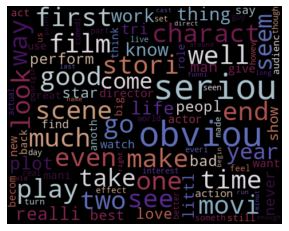

<Figure size 720x720 with 0 Axes>

In [51]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="twilight_shifted",
                      background_color="black").generate(' '.join(word_list))
                      
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

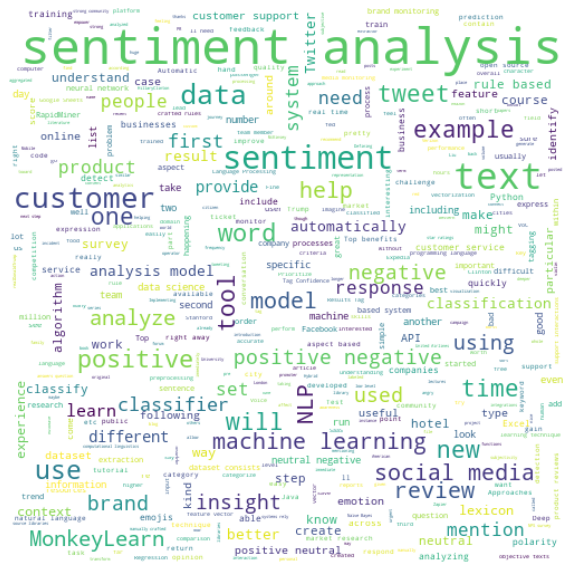

In [105]:
mask = np.array(Image.open('/content/drive/My Drive/Sentiment Analysis/movie_reviews/Side Stuff/Screenshot 2020-08-24 at 8.12.06 PM.png'))
font_path = '/content/drive/My Drive/Sentiment Analysis/movie_reviews/Side Stuff/milcandy/Milcandy.ttf'

from wordcloud import STOPWORDS

def plot_cloud(mask):
  wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)

  wc.generate(article.text)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis('off')
  plt.show()

plot_cloud(mask)

Sentiment Analsyis is very useful in knowing what people want and state of mind people whether it is business, elections, porduct and even in real life.

```
It depicts what the majority wants. 
```



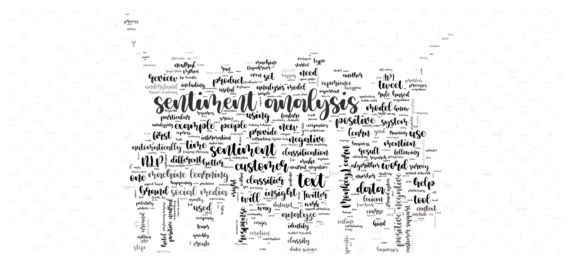

In [107]:
from wordcloud import ImageColorGenerator
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=1000, max_font_size=1600,
               random_state=70, width=mask.shape[1],
               height=mask.shape[0], color_func=mask_colors)

wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

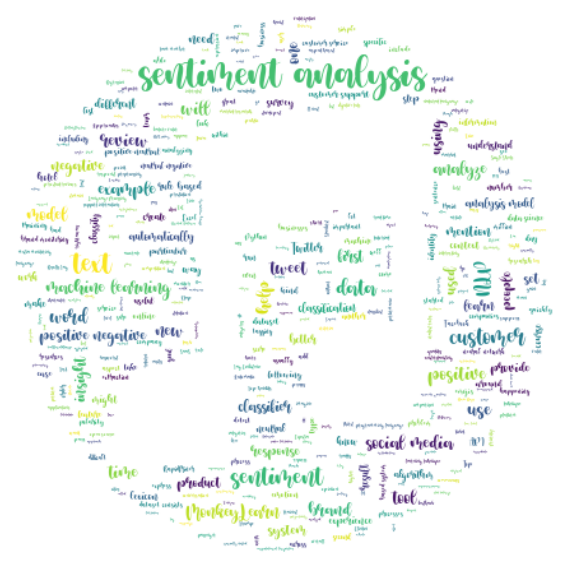

In [108]:
mask = np.array(Image.open('/content/drive/My Drive/Sentiment Analysis/movie_reviews/Side Stuff/Screenshot 2020-09-02 at 6.19.14 PM.png'))

def plot_cloud_coloured(mask):
  mask_colors = ImageColorGenerator(mask)
  wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=1000, max_font_size=1600,
               random_state=70, width=mask.shape[1],
               height=mask.shape[0])

  wc.generate(article.text)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis('off')
  plt.show()

plot_cloud_coloured(mask)

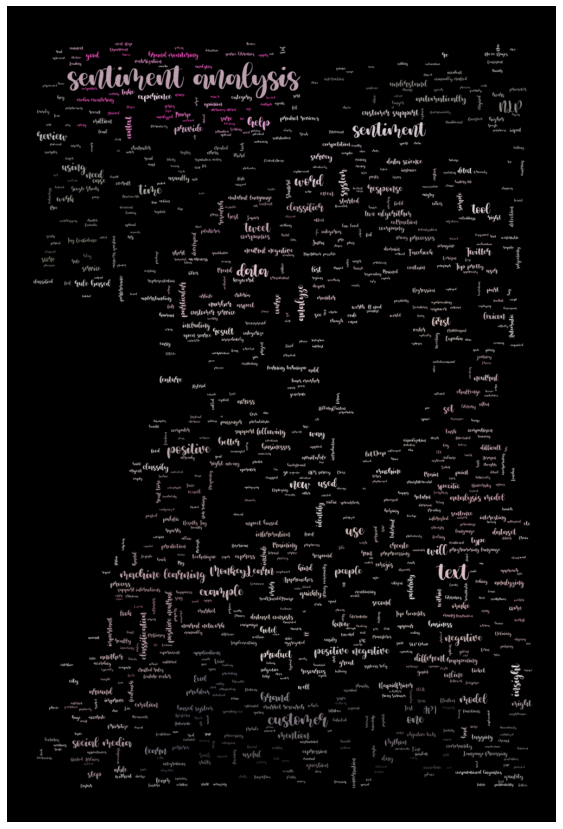

In [109]:
mask = np.array(Image.open('/content/drive/My Drive/Sentiment Analysis/movie_reviews/Side Stuff/Screenshot 2020-08-24 at 7.47.38 PM.png'))

mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="black",
               max_words=1000, max_font_size=1600,
               random_state=70, width=mask.shape[1],
               height=mask.shape[0], color_func=mask_colors)

wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# LOADING THE DATA And CLEANING

*Directory* - 


*   Sentiment Analysis 
      *   NLTK Data (movie_reviews)
          *   neg
          *   pos

    

---





In [200]:
"""loading all the txt files from 2 folders, neg and pos"""


# positive
printpos("\n\nStoring Positive Samples :")

pos = []
path_pos = '/content/drive/My Drive/Sentiment Analysis/movie_reviews/pos/*.txt'
files = glob.glob(path_pos)
for name in tqdm(files):
        with open(name) as f:
          pos.append(f)

#negative
printneg("\n\nStoring Negative Samples :")

neg = []
path_neg = '/content/drive/My Drive/Sentiment Analysis/movie_reviews/neg/*.txt'
files = glob.glob(path_neg)
for name in tqdm(files):
        with open(name) as f:
          neg.append(f)

printuniv("\n\nDone woth storing file names Positive samples in pos[] and Negative samples in neg[]")



Storing Positive Samples :


100%|██████████| 849/849 [00:00<00:00, 1801.92it/s]




Storing Negative Samples :


100%|██████████| 844/844 [00:00<00:00, 1861.47it/s]




Done woth storing file names Positive samples in pos[] and Negative samples in neg[]


In [201]:
printpos("Storing Positive Samples : ")
print(pos[0:2])
printneg("\nStoring Negative Samples : ")
print(neg[0:2])

Storing Positive Samples : 
[<_io.TextIOWrapper name='/content/drive/My Drive/Sentiment Analysis/movie_reviews/pos/cv245_8569.txt' mode='r' encoding='UTF-8'>, <_io.TextIOWrapper name='/content/drive/My Drive/Sentiment Analysis/movie_reviews/pos/cv741_11890.txt' mode='r' encoding='UTF-8'>]

Storing Negative Samples : 
[<_io.TextIOWrapper name='/content/drive/My Drive/Sentiment Analysis/movie_reviews/neg/cv164_23451.txt' mode='r' encoding='UTF-8'>, <_io.TextIOWrapper name='/content/drive/My Drive/Sentiment Analysis/movie_reviews/neg/cv615_15734.txt' mode='r' encoding='UTF-8'>]


In [202]:
"""Lengths"""
printpos("Positive number of samples : ")
print(len(pos))
printneg("\nNegative number of samples : ")
print(len(neg))

Positive number of samples : 
849

Negative number of samples : 
844


In [203]:
 """Removing all unwanted words/characters form the text of both positive and negative samples.
Just keeping, characters and numbers and removing all punctuations and any other special characters"""

import re

#Positive Samples --------------------------------------------------------------
printpos("Doing Positve samples : ")
pos_data = []
len_pos = []

for i in tqdm(range(len(pos))):
  a = open(pos[i].name,'rt')
  data = a.read()
  data = data.lower()
  line = re.sub(r"[^a-zA-Z0-9]+", ' ', data)
  len_pos.append(len(line))
  pos_data.append(line)


#Negative Samples --------------------------------------------------------------
printneg("\n\nDoing Negative samples :  ")
neg_data = []
len_neg = []

for i in tqdm(range(len(neg))):
  a = open(neg[i].name,'rt')
  data = a.read()
  data = data.lower()
  line = re.sub(r"[^a-zA-Z0-9]+", ' ', data)
  len_neg.append(len(line))
  neg_data.append(line)


printuniv("\n\nDone with text preprocessing\n")

Doing Positve samples : 


100%|██████████| 849/849 [00:00<00:00, 976.65it/s]




Doing Negative samples :  


100%|██████████| 844/844 [00:00<00:00, 956.47it/s]




Done with text preprocessing



In [204]:
"""Glimpse of the data"""

def Print_data(text, color, arr):
  cprint(text, 'white', color)
  print(arr[0])


Print_data("Glimpse of Positive samples : ", "on_green", pos_data )
Print_data("Glimpse of Negative samples : ", "on_red"  , neg_data )

Glimpse of Positive samples : 
as feel good formulaic as it may be in its own way shall we dance also demonstrates a kind of charming restraint you don t often find in american films this japanese import tells the story of a middle aged accountant named sugiyama koji yakusho whose mundane life is shaken up one night when he spots beautiful mai kishikawa tamiyo kusakari in the window of a dance school intrigued by her melancholy demeanor and slightly infatuated with her sugiyama signs up for weekly classes at the school and much to his amazement ends up as attracted to dancing itself as to his young sensei meanwhile sugiyama s wife hideko hara becomes suspicious of his late wednesday nights and sets a private detective on her husband s trail in a hollywood film you can bet that sub plot would be turned into a stream of slapstick comedy and crazy misunderstandings in shall we dance writer director masayuki suo dispenses with it in a matter of minutes using it to set up later character in

# BERT TOKENIZERS


Tokenization is breaking a text chunk in smaller parts. Whether it is breaking Paragraph in sentences, sentence into words or word in character



> *BERT was trained using the WordPiece tokenization*. It means that a word can be broken down into more than one sub-words.  
   **tokenizer.tokenize** ('Hi my name is Dima')   
   **OUTPUT**. ['hi', 'my', 'name', 'is', 'dim', '##a']



![picture](https://miro.medium.com/max/2000/1*UhfwmhMN9sdfcWIbO5_tGg.jpeg)

---
[Thanks for the article](https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/)

[More Info ( bert) ](https://towardsdatascience.com/bert-to-the-rescue-17671379687f)



In [205]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 40kB 2.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.5-cp36-none-any.whl size=30317 sha256=254f97f1aeef7ab528dcc828abdf1cc8e924e366320535692cd3c5bcee9b1d9b
  Stored in directory: /root/.cache/pip/wheels/2e/70/a2/be357037dd2cbdcaeb0add1fdf083be6a600ca65ee1f68751c
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=bc68f6b948055c0614c6a196dee3c84f712f8d40f894cfa3455b3ad0627f6f90
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=72d98920bc1bd12756ff0509bfedaeabf2925aa4371709ae864c599896a2ebec
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.1MB 4.7MB/s 


In [206]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert


# Important files to convert reviews to bert tokenizers
BertTokenizer = bert.bert_tokenization.FullTokenizer # Tokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False) # Weights
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)


printuniv("Installed all primary requirements for BERT TOKENIZERS")

Installed all primary requirements for BERT TOKENIZERS


In [207]:
""" 
  Function to convert text to bert tokenizers
"""

def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [208]:
total = []
for i in tqdm(range(len(pos_data))):
  total.append([pos_data[i],1])

for i in tqdm(range(len(neg_data))):
  total.append([neg_data[i],0])
  
  
#Shuffle
np.random.shuffle(total)


reviews = [total[i][0] for i in range(len(total))] # coresponds to the encoding
y = [total[i][1] for i in range(len(total))] # coresponds to either being pos or neg

100%|██████████| 844/844 [00:00<00:00, 302641.07it/s]


In [209]:
# Data structure and Glimpse

printuniv("Glimpse of reviews")
print(reviews[0])

printuniv("Glimpse of y")
print(y[0])


Glimpse of reviews
in october of 1997 audiences were dazzled by the horror surprise hit i know what you did last summer the film went on to gross over 70 million dollars in the u s and even developed a cult following much like the previous year s 100 million dollar grossing scream when the trailer hit theaters in september attached to urban legend it looked like a wonderful follow up did it live up to the first film the answer is no jennifer love hewitt returns as julie james a survivor of the serial killer that attempted to kill her and her friends a year before she has been so upset since the incident nightmares haunt her all over the place but she has to move on she know attends college and is best friends with a funny outgoing girl named karla brandy who is trying to hook julie up with will benson played by newcomer matthew settle karla s boyfriend is tyrell the funny outgoing type who is played by soul food s mekhi phifer freddie prinze jr also returns as ray julie s boyfriend fro

In [210]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]
printuniv("tokenized_reviews is now encoding of variable lengths")

tokenized_reviews is now encoding of variable lengths


# LOGISTIC REGRESSION

Logistic Regression is one of the basic and popular algorithm to solve a classification problem. It is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis, used to describe data and to explain the relationship between one dependent binary variable and independent variables.

![SIGMOID](https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg)



---


*Note* - Implemented using sklearn

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [212]:
""" The encoding are made of same length , max length is 2553 """
tokenized = [np.pad(tokenized_reviews[i],(0 ,2553 - (len(tokenized_reviews[i]))), mode='constant', constant_values=0) 
              for i in range(len(tokenized_reviews))]

printuniv("tokenized is now encoding of fixed length ( 2553) padded with 0 at ends")

tokenized is now encoding of fixed length ( 2553) padded with 0 at ends


In [213]:
""" Splitting the data """

X_train, X_test, y_train, y_test = train_test_split(tokenized, y, test_size=0.3, random_state=0)
print("Train data length : " + str(len(X_train)))
print("Test data length  : " + str(len(X_test)))

Train data length : 1185
Test data length  : 508


In [214]:
X__ = [np.array(X_train[i]) for i in range(len(X_train))] # X__ is simply numpy array of X_train

In [215]:
# training the data 

logreg = LogisticRegression()
logreg.fit(X__, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
# result 

y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.5177165354330708


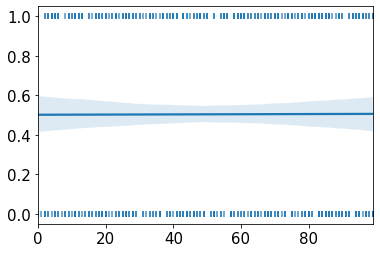

In [234]:
#Plot
import seaborn as sns
sns.regplot(x=np.random.randint(0,100,508), y=y_test, data=y_pred, logistic=True,marker="|")

# RANDOM FOREST REGRESSOR

Method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

---

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

![RANDOM FOREST REGRESSOR](https://lh5.googleusercontent.com/ZzEagZv-a3KFCSr610aEvXIPTRTWV_cFdgpXoDFlj_r7A8ex5L0aE33aLuQptfngJLiT5xX3yk8LwGAyvOVY9rIsqe1ZZmIvg71yQIdXuVxuPpgmvm85aAxmP32M-ODq6_E3uxrV)



In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X__, y_train)
y_pred = regressor.predict(X_test)

In [237]:
Y_PRED = [int(y_pred[i]<=0.5) for i in range(len(y_pred))] # by observation to make code easy

In [238]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_PRED))

0.4862204724409449


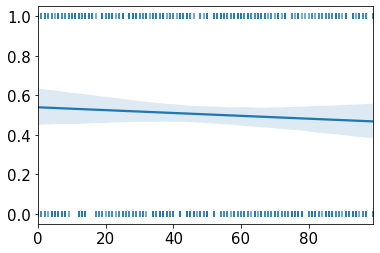

In [239]:
#plot
#Plot
import seaborn as sns
sns.regplot(x=np.random.randint(0,100,508), y=y_test, data=Y_PRED, logistic=True,marker="|")

# MY ENCODING AND MODELS


STEPS FOLLOWED : 

1. In this section, I have cleaned the dataset by using lemmatizers,porter, stop words etc.
2.  Picked top 1000 words. 
3.  Built various graphs and even created polarity to give insights to the viewer
4.  Executed models and their graphs


NOTE: In middle there is a section of EDA




***STEP 1***

Cleaning the data further using porter, lemmatizer, stop words etc

In [113]:
"""We count the frequencies of neg, pos and both"""
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

# Stop words are most comomon words in english
stop_words = set(stopwords.words('english'))
stop_words.add('br')

# keeps count of both negative and positve
word_freq = Counter()


#Positive ----------------------------------------------
printpos("Cleaning Positive data\n")
final_pos = []

# keeps count of positive 
pos_words=Counter()
for i in tqdm(range(len(pos_data))):
  a = word_tokenize(pos_data[i])
  a = [words for words in a if words not in stop_words]
  a = [porter.stem(word) for word in a]
  pos_words.update(a);
  word_freq.update(a)
  final_pos.append(a)



#Negative ----------------------------------------------
printneg("\n\nCleaning Negative data\n")
final_neg = []

# keeps count of negative
neg_words = Counter()
for i in tqdm(range(len(neg_data))):
  a = word_tokenize(neg_data[i])
  a = [words for words in a if words not in stop_words]
  a = [porter.stem(word) for word in a]
  word_freq.update(a)
  neg_words.update(a)
  final_neg.append(a)

printuniv("\n\nCleaned the data")

Cleaning Positive data



100%|██████████| 849/849 [00:07<00:00, 109.72it/s]




Cleaning Negative data



100%|██████████| 844/844 [00:07<00:00, 120.48it/s]




Cleaned the data


In [54]:
printuniv("Glimpse of the tokenized words\n")
final_neg[0][0:10]

Glimpse of the tokenized words



['ever',
 'watch',
 'young',
 'child',
 'tri',
 'tell',
 'joke',
 'beyond',
 'sophist',
 'full']

***STEP 2***

Picking top 1000 most common words and building encoding over using them

In [55]:
"""Picking the most common 1000 words and manipulating them"""

printuniv("1. Finding the top 1000 words from both negative and positive combined\n")
top_sorted_words = word_freq.most_common(1000)
print(top_sorted_words)


printuniv("\n\n2. Mapping words with number\n")
word_to_int = {w:i+1 for i,(w,c) in enumerate(top_sorted_words)}
print(word_to_int)


printuniv("\n\n3. Extracting out the words and freq from the top_sorted_words in separate arrays\n")
word_list = [w for w,c in top_sorted_words]
number_list = [ c for w,c in top_sorted_words]
print(word_list)




1. Finding the top 1000 words from both negative and positive combined

[('film', 9064), ('movi', 5805), ('one', 4964), ('like', 3374), ('charact', 3187), ('get', 2741), ('make', 2649), ('time', 2486), ('scene', 2164), ('even', 2154), ('good', 2047), ('play', 1942), ('stori', 1908), ('see', 1813), ('would', 1743), ('much', 1694), ('go', 1693), ('well', 1644), ('two', 1601), ('also', 1585), ('end', 1544), ('way', 1526), ('first', 1517), ('look', 1492), ('take', 1475), ('seem', 1469), ('come', 1459), ('year', 1442), ('thing', 1404), ('work', 1361), ('life', 1349), ('plot', 1316), ('realli', 1294), ('know', 1279), ('peopl', 1240), ('perform', 1238), ('littl', 1221), ('love', 1216), ('could', 1188), ('bad', 1177), ('star', 1159), ('tri', 1153), ('man', 1151), ('never', 1147), ('best', 1139), ('show', 1113), ('director', 1078), ('mani', 1052), ('new', 1048), ('give', 1044), ('want', 1038), ('say', 1026), ('find', 1018), ('watch', 1011), ('actor', 1009), ('action', 985), ('great', 975), ('th

AN OBSERVATION : 

Total Number of words : 
23906

Number of words with frequency more than or equal to 5 : 
9780


Text(0, 0.5, ' x Frequency')

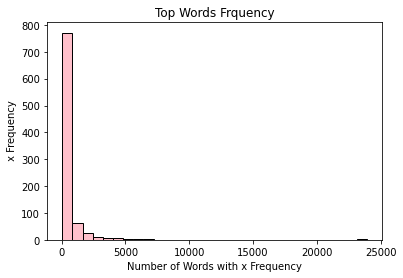

In [56]:
""" An Observation to be made : """

min_occurane = 5
token = [k for k,c in word_freq.items() if c >= min_occurane]

printuniv("Total Number of words : ")
print(len(word_freq))
printuniv("\nNumber of words with frequency more than or equal to 5 : ")
print(len(token))




value = []
for i in range(900):
  min_occurane = i
  tokens = [k for k,c in word_freq.items() if c >= min_occurane]
  value.append(len(tokens))
  
plt.hist(value, color = 'pink', edgecolor = 'black', bins = int(30))
plt.title('Top Words Frquency')
plt.xlabel("Number of Words with x Frequency")
plt.ylabel(" x Frequency")


# Note - there is exponential decrease as soon as freqency is increased to 5

# ***Exploratory Data Analysis***


Exploring dataset and concluding various insights and plots.

![EDA](https://miro.medium.com/fit/c/1759/528/1*qKqkxcV6BYijDAsy4mNigA.png)

TEXT

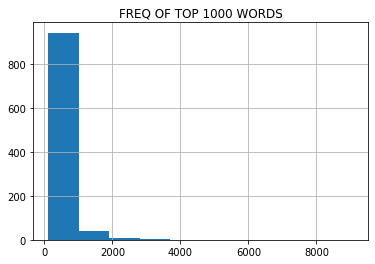

In [57]:
length= []
for i in range(1000):
  length.append(top_sorted_words[i][1])

pd.Series(length).hist()
plt.title("FREQ OF TOP 1000 WORDS")
plt.show()

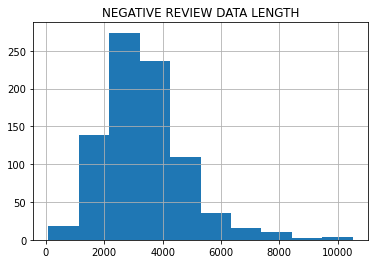

In [58]:
pd.Series(len_neg).hist()
plt.title("NEGATIVE REVIEW DATA LENGTH")
plt.show()

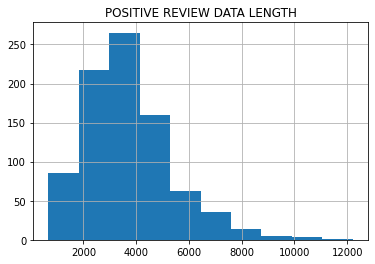

In [59]:
pd.Series(len_pos).hist()
plt.title("POSITIVE REVIEW DATA LENGTH")
plt.show()

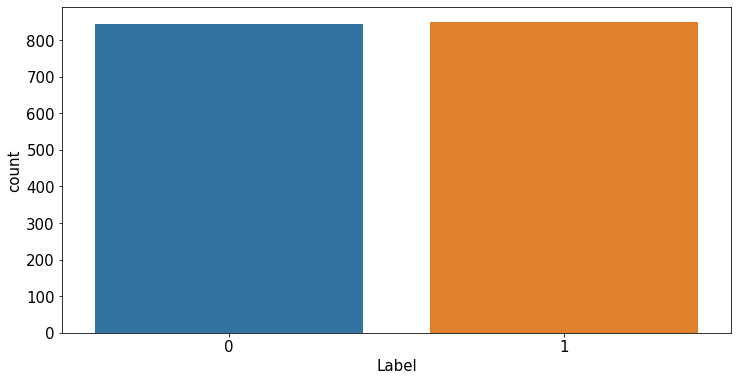

In [195]:
Df = pd.DataFrame(list(zip(reviews, y)), columns =['Text', 'Label'])
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=Df)

COMMON WORDS

In [111]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

df = pd.DataFrame(list(zip(word_list[0:30], number_list[0:30])), 
               columns =['Words', 'Freq'])

printuniv("MOST COMMON WORDS")

df.columns = ['Words','Freq']
df.style.background_gradient(cmap='magma')




MOST COMMON WORDS


,Words,Freq
0,film,9064
1,movi,5805
2,one,4964
3,like,3374
4,charact,3187
5,get,2741
6,make,2649
7,time,2486
8,scene,2164
9,even,2154


In [61]:
fig = px.bar(df, x='Freq', y="Words", title='Commmon Words in Text', orientation='h', 
             width=500, height=700, color='Words')
fig.show()

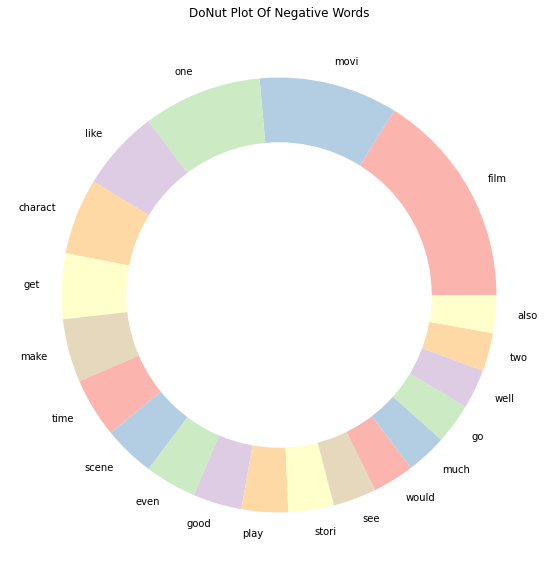

In [188]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(df['Freq'], labels=df['Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Negative Words')
plt.show()

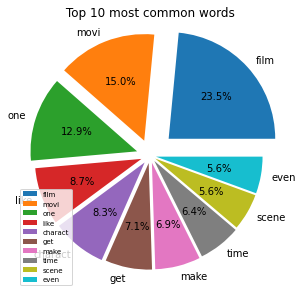

In [189]:
""" Building Pie Chart of top 10 words """

final_sorted = word_freq.most_common(10) # pair of (words,frequency) of top 10 words

sum_freq = sum({c for i,(w,c) in enumerate(final_sorted)}) # sum of all frequencies of top 10 words

list_freq = [c for i,(w,c) in enumerate(final_sorted)] # list of frequencies of top 10 words

list_of_fraction_of_freq = [c/sum_freq for i,(w,c) in enumerate(final_sorted)]  # explode 1st slice

word_list_10 = [w for i,(w,c) in enumerate(final_sorted)]

# Building Pie Chart
plt.pie(list_freq, explode = list_of_fraction_of_freq, labels = word_list_10 , autopct='%1.1f%%')
plt.legend( word_list_10, loc='lower left',fontsize='x-small', markerfirst = True)
plt.tight_layout()
plt.title(' Top 10 most common words ')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

NEGATIVE WORDS

In [164]:
printuniv("\n\n Extracting out the words and freq from the neg words in separate arrays\n")

top_sorted_words_neg = neg_words.most_common(100)

word_list_neg = [w for w,c in top_sorted_words_neg]
number_list_neg = [ c for w,c in top_sorted_words_neg]


df1 = pd.DataFrame(list(zip(word_list_neg[80:90], number_list_neg[80:90])), 
               columns =['Words', 'Freq'])

temp_neutral = df1.loc[1:,:]

printneg("MOST COMMON NEG WORDS")

df1.columns = ['Words','Freq']
df1.style.background_gradient(cmap='YlOrBr')





 Extracting out the words and freq from the neg words in separate arrays

MOST COMMON NEG WORDS


,Words,Freq
0,around,391
1,effect,387
2,comedi,386
3,day,382
4,funni,382
5,name,377
6,part,372
7,live,372
8,origin,370
9,long,367


In [165]:
temp_neutral

,Words,Freq
1,effect,387
2,comedi,386
3,day,382
4,funni,382
5,name,377
6,part,372
7,live,372
8,origin,370
9,long,367


In [146]:
fig = px.bar(df1, x='Freq', y="Words", title='Commmon Words in NEG Text', orientation='h', 
             width=500, height=700, color='Words')
fig.show()

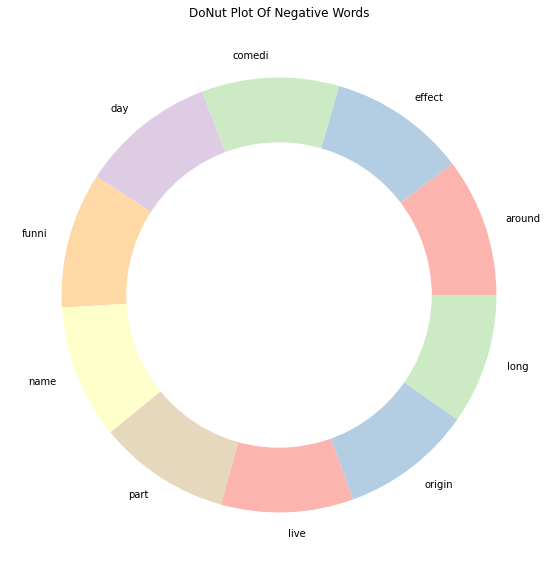

In [186]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(df1['Freq'], labels=df1['Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Negative Words')
plt.show()

POSITIVE WORDS

In [147]:
printuniv("\n\n3. Extracting out the words and freq from the pos words in separate arrays\n")

top_sorted_words_pos = pos_words.most_common(100)


word_list_pos = [w for w,c in top_sorted_words_pos]
number_list_pos = [ c for w,c in top_sorted_words_pos]


df2 = pd.DataFrame(list(zip(word_list_pos[40:50], number_list_pos[40:50])), 
               columns =['Words', 'Freq'])

printpos("MOST COMMON POS WORDS")

df2.columns = ['Words','Freq']
df2.style.background_gradient(cmap='YlGn')



3. Extracting out the words and freq from the pos words in separate arrays

MOST COMMON POS WORDS


,Words,Freq
0,star,615
1,littl,613
2,show,612
3,never,597
4,find,584
5,new,576
6,give,551
7,could,530
8,world,520
9,becom,518


In [148]:
fig = px.bar(df2, x='Freq', y="Words", title='Commmon Words in POS Text', orientation='h', 
             width=500, height=700, color='Words')
fig.show()

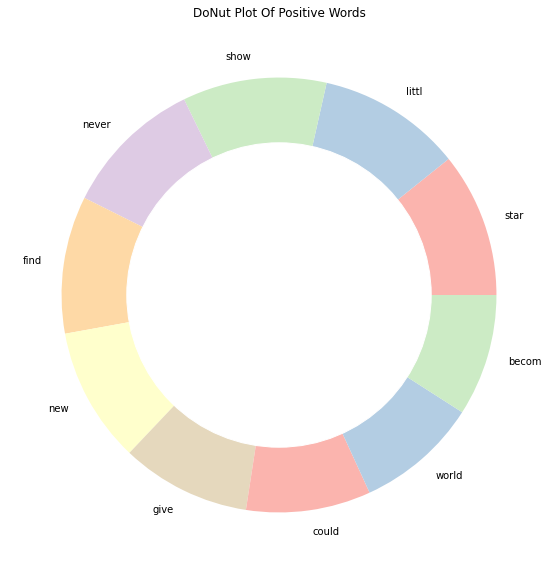

In [187]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(df2['Freq'], labels=df2['Words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Positive Words')
plt.show()

CONVERTED TO ENCODINGS

In [64]:
printuniv("Converting into encoding: \n")

#Postive Data----------------------------------------------------
printpos("Encoding of Positive data:\n")
encoded_review_pos = []
for line in tqdm(final_pos):
  temp = []
  for w in line:
    if w in word_list:
      temp.append(word_to_int[w])
    else:
      temp.append(0)
  encoded_review_pos.append(temp)

#Negative Data----------------------------------------------------
printneg("\nEncoding of Negative data:\n")
encoded_review_neg = []
for line in tqdm(final_neg):
  temp = []
  for w in line:
    if w in word_list:
      temp.append(word_to_int[w])
    else:
      temp.append(0)
  encoded_review_neg.append(temp)

Converting into encoding: 

Encoding of Positive data:



100%|██████████| 849/849 [00:02<00:00, 394.04it/s]



Encoding of Negative data:



100%|██████████| 844/844 [00:01<00:00, 448.60it/s]


***STEP 3*** 

Creating polarity and plots

In [65]:
""" Creating Polarity : PREPROCESSING"""

# Picking out top 500 words from each neg and pos in the format (words, freq)
top_sorted_neg = neg_words.most_common(500)
top_sorted_pos = pos_words.most_common(500)
printuniv("Positive sorted words and frequencies : ")
print(top_sorted_pos)
print("\n")

# Storing all the words in separate list
top_neg_words = [w for w,c in top_sorted_neg]
top_pos_words = [w for w,c in top_sorted_pos]
printuniv("\nPositive sorted words : ")
print(top_pos_words)
print("\n")

#Finding the total sum of all Frequncies 
total_freq_neg = sum({c for i,(w,c) in enumerate(top_sorted_neg)})
total_freq_pos = sum({c for i,(w,c) in enumerate(top_sorted_pos)})
printuniv("\nSum of Positive frequencies : ")
print(total_freq_pos)
print("\n")

# We create weights = freq of ith words / sum of all freq and creating new list of the format (words, weights)
weightes_neg_sorted =[(w,c/total_freq_neg) for i, (w,c) in enumerate(top_sorted_neg)]
weightes_pos_sorted =[(w,c/total_freq_pos) for i, (w,c) in enumerate(top_sorted_pos)]
printuniv("\nositive sorted words and weights : ")
print(weightes_pos_sorted)
print("\n")

Positive sorted words and frequencies : 
[('film', 4886), ('movi', 2656), ('one', 2562), ('charact', 1707), ('like', 1610), ('make', 1403), ('time', 1286), ('get', 1280), ('stori', 1114), ('scene', 1092), ('good', 1062), ('even', 1005), ('play', 1004), ('see', 999), ('also', 962), ('well', 939), ('life', 900), ('way', 848), ('would', 847), ('much', 841), ('two', 829), ('go', 824), ('end', 822), ('first', 815), ('take', 814), ('year', 799), ('come', 766), ('perform', 760), ('seem', 743), ('work', 729), ('best', 711), ('love', 707), ('peopl', 683), ('thing', 678), ('look', 644), ('great', 644), ('know', 637), ('mani', 636), ('realli', 622), ('man', 616), ('star', 615), ('littl', 613), ('show', 612), ('never', 597), ('find', 584), ('new', 576), ('give', 551), ('could', 530), ('world', 520), ('becom', 518), ('use', 517), ('role', 510), ('director', 508), ('plot', 506), ('tri', 505), ('want', 504), ('effect', 501), ('say', 496), ('actor', 495), ('watch', 493), ('back', 486), ('feel', 485), 

In [67]:
""" Creating list that stores polarity """

# Positive -----------------------------------------------------------
polarity_pos = []
for i in tqdm(range(len(final_pos))):
  val = 0
  for index in range(len(final_pos[i])):
    for j,(w,c) in enumerate(weightes_pos_sorted):
      if  final_pos[i][index]== w and final_pos[i][index]!=0 :
        val += c*(j+1)*(9/10)

    for j,(w,c) in enumerate(weightes_neg_sorted):
      if final_pos[i][index]== w and final_pos[i][index]!=0 :
        val -= c*(j+1)*(1/10)
  polarity_pos.append(val/10)



# Negative -----------------------------------------------------------
polarity_neg = []
for i in tqdm(range(len(final_neg))):
  val = 0
  for index in range(len(final_neg[i])):
    for j,(w,c) in enumerate(weightes_pos_sorted):
      if  final_neg[i][index]== w and final_neg[i][index]!=0 :
        val += c*(j+1)*(1/10)

    for j,(w,c) in enumerate(weightes_neg_sorted):
      if final_neg[i][index]== w and final_neg[i][index]!=0 :
        val -= c*(j+1)*(9/10)
  polarity_neg.append(val/10)

print("\n")
print(min(polarity_pos))
print(max(polarity_neg))

100%|██████████| 844/844 [00:48<00:00, 17.51it/s]



0.6177754295072088
-0.09126069142282561


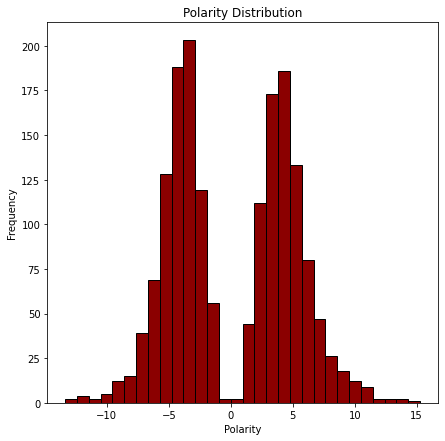

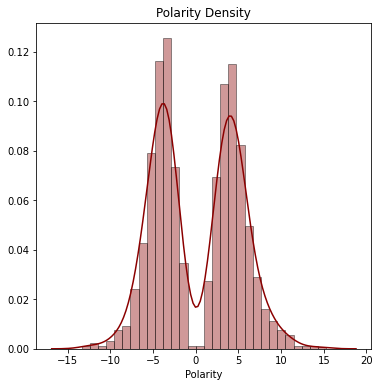

<Figure size 432x432 with 0 Axes>

In [69]:
#Polarity Distribution 

polarity = []

#positive
for i in range(len(polarity_pos)):
  polarity.append(polarity_pos[i])

#negative
for i in range(len(polarity_neg)):
  polarity.append(polarity_neg[i])

# Histograms

# Polarity Distribution

def Polarity_distribution(polarity):
  plt.hist(polarity, color = 'darkred', edgecolor = 'black',bins = int(30))
  plt.title('Polarity Distribution')
  plt.xlabel("Polarity")
  plt.ylabel("Frequency")
  plt.figure(figsize = (6,6))

from pylab import rcParams
rcParams['figure.figsize'] = 7,7


# Polarity Density
import seaborn as sns
def Polarity_density(polarity):
  sns.distplot(polarity, hist=True, kde=True, bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
  plt.title('Polarity Density')
  plt.figure(figsize = (6,6))
  from pylab import rcParams
  rcParams['figure.figsize'] = 10,15


Polarity_distribution(polarity)
Polarity_density(polarity)

***STEP 4***

Building models and converting data to required format

In [73]:
#Adding padding to the encoding
encoded_review_pos = tf.keras.preprocessing.sequence.pad_sequences(encoded_review_pos, maxlen=300,padding = 'post')
encoded_review_neg = tf.keras.preprocessing.sequence.pad_sequences(encoded_review_neg, maxlen=300,padding = 'post')


encoded_review_pos = np.array(encoded_review_pos)
printpos("Shape of encoding : ")
print(encoded_review_pos.shape)


encoded_review_neg = np.array(encoded_review_neg)
printneg("Shape of encoding : ")
print(encoded_review_neg.shape)


encoded_total = []
for i in tqdm(range(len(encoded_review_pos))):
  encoded_total.append([encoded_review_pos[i],1])

for i in tqdm(range(len(encoded_review_neg))):
  encoded_total.append([encoded_review_neg[i],0])

Shape of encoding : 
(849, 300)
Shape of encoding : 
(844, 300)


100%|██████████| 844/844 [00:00<00:00, 682473.99it/s]


In [74]:
print(encoded_total[0])

[array([ 73,  11, 882, 107,  22,   0, 738,  20,   0, 178, 514,   0, 345,
        53, 172,   1,   0, 493, 125,  13, 552, 430,   0,  91,   0,   0,
         0, 277,   0,  31,   0,   3, 217,   0, 239,   0,   0,   0,   0,
         0, 738, 254,   0,   0,   0, 837,   0,   0, 759,   0, 695, 254,
        16, 553,  21, 656, 738, 123,   0,   0,   0, 167,   0,   0,  60,
         0, 503,   0, 217,  76, 740, 853, 429,   0, 184,   1,   0,   0,
        32,  15,  71,   0,   0,  81,   0,   0,   0, 738, 281,  47,   0,
         0,   0, 320, 100,  59,  76, 343,   5,   0, 177, 209,   0,  13,
         0, 883,   7,   0, 113,   0,   0, 357, 196, 970,   0,   0,   0,
        50,  81, 721,   0, 569, 320, 447, 212,   0,   5, 177, 211, 411,
       130,   0,   0, 738, 139, 665, 118,   1,   0,   0, 458,   0,   0,
       738,   0, 163,   0, 211, 640,  13, 145, 942,   0,   0, 738, 254,
         0, 738,  12,  62, 511,   0, 231,   0,   0, 174,  25, 920,  42,
        49, 122, 705, 604,  49, 122,   3,   0,   0, 521,   0, 2

In [75]:
#Shuffle
np.random.shuffle(encoded_total)

Y_label = [] # coresponds to either being pos or neg
X_label = [] # coresponds to the encoding

for i in tqdm(range(len(encoded_total))):
  Y_label.append(encoded_total[i][1])
  X_label.append(encoded_total[i][0])

100%|██████████| 1693/1693 [00:00<00:00, 583336.62it/s]


In [258]:
#converting to tensors
X_label = tf.convert_to_tensor(
    X_label, dtype=None, dtype_hint=None, name=None
)
print(X_label.shape)

Y_label = tf.convert_to_tensor(
    Y_label, dtype=None, dtype_hint=None, name=None
)
print(Y_label.shape)

(1693, 300)
(1693,)


In [259]:
def graph_VAL_TRAIN(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,31)
  plt.figure(figsize=(6,6))
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

MODEL 1 

In [260]:
# BASE MODEL
def model(emb_dim,max_len,vocab_size,lstm_units):
  X_input = kl.Input(shape=(300,))
  X = kl.Embedding(vocab_size,emb_dim, embeddings_initializer=tf.keras.initializers.GlorotUniform())(X_input)
  X = kl.Bidirectional(kl.LSTM(units = lstm_units, return_sequences=True))(X)
  X = kl.Bidirectional(kl.LSTM(units = lstm_units))(X)
  X = kl.Dense(128,activation = tf.nn.relu , kernel_initializer=tf.keras.initializers.GlorotUniform())(X)
  X = kl.Dropout(0.01)(X)
  X = kl.Dense(1,activation = tf.nn.sigmoid , kernel_initializer=tf.keras.initializers.GlorotUniform())(X)
  
  model = tf.keras.models.Model(inputs=X_input,outputs=X)
  return model

In [261]:
my_model = model(256,300,1001,256)
optim = tf.keras.optimizers.Adam(learning_rate = 1e-12)
my_model.compile(optimizer=optim,loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
my_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 256)          256256    
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 512)          1050624   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [262]:
history = my_model.fit(X_label, Y_label, epochs=30, batch_size=32,validation_split=0.2)

Epoch 1/30
43/43 [==============================] - 6s 132ms/step - loss: 0.6934 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 2/30
43/43 [==============================] - 5s 106ms/step - loss: 0.6934 - accuracy: 0.4682 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 3/30
43/43 [==============================] - 5s 107ms/step - loss: 0.6934 - accuracy: 0.4764 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 4/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4616 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 5/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4778 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 6/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4749 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 7/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4675 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 

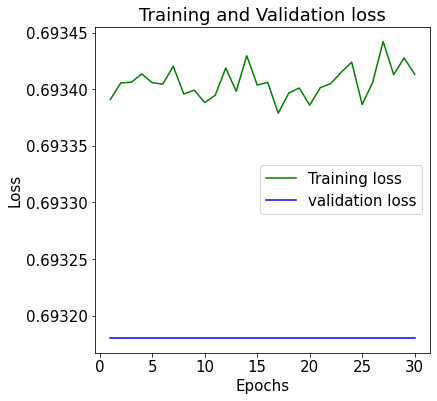

In [263]:
graph_VAL_TRAIN(history)

MODEL 2

In [264]:
# BASE MODEL 2
def model2(emb_dim,max_len,vocab_size,lstm_units):
  X_input = kl.Input(shape=(300,))
  X = kl.Embedding(vocab_size,emb_dim, embeddings_initializer=tf.keras.initializers.GlorotUniform())(X_input)
  X = kl.Bidirectional(kl.LSTM(units = 64, return_sequences=True))(X)
  X = kl.Bidirectional(kl.LSTM(units = lstm_units))(X)
  X = kl.Dense(100,activation = tf.nn.relu )(X)
  X = kl.Dense(1,activation = "sigmoid")(X)
  
  model = tf.keras.models.Model(inputs=X_input,outputs=X)
  return model

In [265]:
my_model2 = model2(128,300,10001,128)
optim = tf.keras.optimizers.Adam(learning_rate = 1e-12)
my_model2.compile(optimizer=optim,loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
my_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 300, 128)          1280128   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300, 128)          98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 1,667,913
Trainable params: 1,667,913
Non-trainable params: 0
____________________________________________

In [266]:
history2 = my_model.fit(X_label, Y_label, epochs=30, batch_size=32,validation_split=0.2)

Epoch 1/30
43/43 [==============================] - 5s 109ms/step - loss: 0.6934 - accuracy: 0.4675 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 2/30
43/43 [==============================] - 5s 107ms/step - loss: 0.6934 - accuracy: 0.4705 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 3/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4675 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 4/30
43/43 [==============================] - 5s 107ms/step - loss: 0.6934 - accuracy: 0.4756 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 5/30
43/43 [==============================] - 5s 107ms/step - loss: 0.6934 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 6/30
43/43 [==============================] - 5s 107ms/step - loss: 0.6934 - accuracy: 0.4712 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 7/30
43/43 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.4712 - val_loss: 0.6932 - val_accuracy: 0.4779
Epoch 

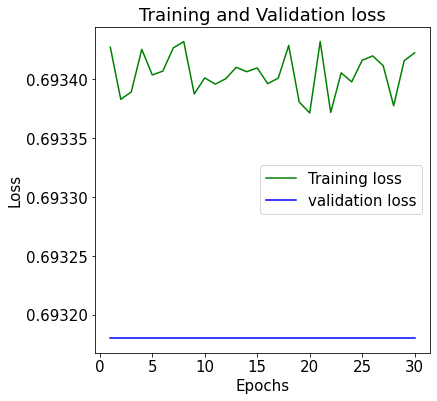

In [267]:
graph_VAL_TRAIN(history2)

# USING BERT ENCODING FOR BUILDING FURTHER MODELS TO GET BETTER RESULT

In [240]:
""" Sorting by length and shuffling """

reviews_with_len = [[review, y[i], len(review)] for i, review in enumerate(tokenized_reviews)]
np.random.shuffle(reviews_with_len)
reviews_with_len.sort(key=lambda x: x[2])
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))


In [241]:
""" Creating batch size and padding """

BATCH_SIZE = 16
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [242]:
TOTAL_BATCHES = np.math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [246]:
# the model as a class
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [270]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

In [285]:
# instantiate object
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [286]:
text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

In [287]:
# Training
history = text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
96/96 [==============================] - 7s 73ms/step - loss: 0.6744 - accuracy: 0.5506
Epoch 2/5
96/96 [==============================] - 7s 74ms/step - loss: 0.3622 - accuracy: 0.8617
Epoch 3/5
96/96 [==============================] - 7s 74ms/step - loss: 0.0471 - accuracy: 0.9928
Epoch 4/5
96/96 [==============================] - 7s 73ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 5/5
96/96 [==============================] - 7s 73ms/step - loss: 0.0020 - accuracy: 1.0000


In [288]:
results = text_model.evaluate(test_data)
print(results)

10/10 [==============================] - 0s 9ms/step - loss: 0.5316 - accuracy: 0.7625
[0.531594455242157, 0.762499988079071]


# FINAL CONCLUSION

In [299]:
text = ["Random Forest Regressor" , "Logistic Regression", "model 1 ", "model 2", "Bert Embedding model"]
accuracy = [0.4862204724409449, 0.5177165354330708, 0.4779, 0.4779, 0.762499988079071 ]

df = pd.DataFrame(list(zip(text, accuracy)), 
               columns =['Model', 'Accuracy'])

df.columns = ['Model','Accuracy']
df.style.background_gradient(cmap='Set2')

,Model,Accuracy
0,Random Forest Regressor,0.486220
1,Logistic Regression,0.517717
2,model 1,0.477900
3,model 2,0.477900
4,Bert Embedding model,0.762500


# Thoughts

1. Sarcasm Detection isn't handled and is one of the most important issues in Sentiment Analysis
2. Bert Encoding in Random Forest and Logistic Regression can be imporved as lots of 0 are there.
3. Bert Layer is not implemented, rather only encoding are present.